In [ ]:
import numpy as np
import time
import itertools
import pandas as pd
import os

# Генерация данных для .soc файла
def generate_soc_file(filename, num_voters, num_candidates):
    with open(filename, 'w') as f:
        for _ in range(num_voters):
            preferences = np.random.permutation(num_candidates) + 1
            f.write(' '.join(map(str, preferences)) + '\n')

# Загрузка данных из .soc файла
def load_soc_file(filename):
    with open(filename, 'r') as f:
        votes = []
        for line in f:
            votes.append(list(map(int, line.strip().split())))
    return np.array(votes)

# Метод Борда
def borda_ranking(votes):
    num_candidates = votes.shape[1]
    scores = np.zeros(num_candidates)
    for vote in votes:
        for i, candidate in enumerate(vote):
            scores[candidate - 1] += (num_candidates - i - 1)
    return np.argsort(-scores), scores

# Метод Копленда
def copeland_ranking(preference_matrix):
    num_candidates = preference_matrix.shape[0]
    copeland_scores = np.zeros(num_candidates)
    for i in range(num_candidates):
        for j in range(num_candidates):
            if i != j:
                if preference_matrix[i, j] > preference_matrix[j, i]:
                    copeland_scores[i] += 1
                elif preference_matrix[i, j] < preference_matrix[j, i]:
                    copeland_scores[i] -= 1
    return np.argsort(-copeland_scores), copeland_scores

# Метод Лексимакс
def leximax_ranking(votes):
    num_candidates = votes.shape[1]
    leximax_scores = np.zeros((num_candidates, num_candidates))
    for vote in votes:
        for i, candidate in enumerate(vote):
            leximax_scores[candidate - 1, i] += 1
    leximax_scores = np.lexsort(leximax_scores.T)
    return leximax_scores, leximax_scores

# Формирование итогового ранжирования
def combine_rankings(rankings):
    combined_scores = np.zeros(len(rankings[0]))
    for rank in rankings:
        for i, candidate in enumerate(rank):
            combined_scores[candidate] += i
    combined_ranking = np.argsort(combined_scores)
    return combined_ranking

# Расчет расстояния Кемени
def kemeny_distance(rank1, rank2):
    dist = 0
    for i in range(len(rank1)):
        for j in range(i + 1, len(rank1)):
            if (np.where(rank1 == rank1[i])[0][0] - np.where(rank1 == rank2[j])[0][0]) * (np.where(rank2 == rank1[i])[0][0] - np.where(rank2 == rank2[j])[0][0]) < 0:
                dist += 1
    return dist

# Основная часть кода
num_voters = 100
num_candidates = 10
filename = 'generated_data.soc'
num_iterations = 10  # Количество итераций для усреднения

# Проверка существования файла и загрузка предыдущих результатов, если он существует
if os.path.exists("ranking_results.csv"):
    df_results = pd.read_csv("ranking_results.csv")
else:
    df_results = pd.DataFrame(columns=["Method", "Average Time", "Std Time", "Average Kemeny Distance", "Std Kemeny Distance"])

methods = {
    "borda_ranking": borda_ranking,
    "leximax_ranking": leximax_ranking,
    "copeland_ranking": copeland_ranking
}
combinations = list(itertools.combinations(methods.keys(), 3))

original_ranking = np.arange(num_candidates)

print("All possible combinations of three methods out of three:")
for combo in combinations:
    times = []
    kemeny_distances = []

    for _ in range(num_iterations):
        # Генерация исходных данных
        generate_soc_file(filename, num_voters, num_candidates)
        votes = load_soc_file(filename)

        # Построение матрицы предпочтений для метода Копленда
        preference_matrix = np.zeros((num_candidates, num_candidates))
        for vote in votes:
            for i in range(num_candidates):
                for j in range(i + 1, num_candidates):
                    preference_matrix[vote[i] - 1, vote[j] - 1] += 1

        start_time = time.time()

        # Получение ранжирования по каждому методу
        rankings = []
        for method in combo:
            if method == "copeland_ranking":
                rank, _ = methods[method](preference_matrix)
            else:
                rank, _ = methods[method](votes)
            rankings.append(rank)

        # Комбинирование ранжирований
        combined_ranking = combine_rankings(rankings)

        end_time = time.time()
        processing_time = end_time - start_time
        kemeny_dist_combined_original = kemeny_distance(combined_ranking, original_ranking)

        times.append(processing_time)
        kemeny_distances.append(kemeny_dist_combined_original)

    avg_time = np.mean(times)
    std_time = np.std(times)
    avg_kemeny_distance = np.mean(kemeny_distances)
    std_kemeny_distance = np.std(kemeny_distances)

    # Сохранение результатов
    result = pd.DataFrame({
        "Method": ["+".join(combo)],
        "Average Time": [avg_time],
        "Std Time": [std_time],
        "Average Kemeny Distance": [avg_kemeny_distance],
        "Std Kemeny Distance": [std_kemeny_distance]
    })
    df_results = pd.concat([df_results, result], ignore_index=True)

    print(f"Combination: {combo}")
    print("Average Time: {:.2f} seconds".format(avg_time))
    print("Std Time: {:.2f} seconds".format(std_time))
    print("Average Kemeny Distance: {:.2f}".format(avg_kemeny_distance))
    print("Std Kemeny Distance: {:.2f}".format(std_kemeny_distance))
    print()

# Сохранение результатов в DataFrame и экспорт в CSV файл
df_results.to_csv("ranking_results.csv", index=False)

print("Results saved to 'ranking_results.csv'.")


All possible combinations of three methods out of three:
Combination: ('borda_ranking', 'leximax_ranking', 'copeland_ranking')
Average Time: 0.00 seconds
Std Time: 0.00 seconds
Average Kemeny Distance: 15.80
Std Kemeny Distance: 2.89

Results saved to 'ranking_results.csv'.


In [ ]:
import numpy as np
import time
import itertools
import pandas as pd
import os

# Генерация данных для .soc файла
def generate_soc_file(filename, num_voters, num_candidates):
    with open(filename, 'w') as f:
        for _ in range(num_voters):
            preferences = np.random.permutation(num_candidates) + 1
            f.write(' '.join(map(str, preferences)) + '\n')

# Загрузка данных из .soc файла
def load_soc_file(filename):
    with open(filename, 'r') as f:
        votes = []
        for line in f:
            votes.append(list(map(int, line.strip().split())))
    return np.array(votes)

# Метод Лексимин
def leximin_ranking(votes):
    num_candidates = votes.shape[1]
    leximin_scores = np.zeros((num_candidates, num_candidates))
    for vote in votes:
        for i, candidate in enumerate(vote):
            leximin_scores[candidate - 1, i] += 1
    leximin_scores = np.lexsort(leximin_scores.T[::-1])
    return leximin_scores, leximin_scores

# Метод Копленда
def copeland_ranking(preference_matrix):
    num_candidates = preference_matrix.shape[0]
    copeland_scores = np.zeros(num_candidates)
    for i in range(num_candidates):
        for j in range(num_candidates):
            if i != j:
                if preference_matrix[i, j] > preference_matrix[j, i]:
                    copeland_scores[i] += 1
                elif preference_matrix[i, j] < preference_matrix[j, i]:
                    copeland_scores[i] -= 1
    return np.argsort(-copeland_scores), copeland_scores

# Метод Лексимакс
def leximax_ranking(votes):
    num_candidates = votes.shape[1]
    leximax_scores = np.zeros((num_candidates, num_candidates))
    for vote in votes:
        for i, candidate in enumerate(vote):
            leximax_scores[candidate - 1, i] += 1
    leximax_scores = np.lexsort(leximax_scores.T)
    return leximax_scores, leximax_scores

# Формирование итогового ранжирования
def combine_rankings(rankings):
    combined_scores = np.zeros(len(rankings[0]))
    for rank in rankings:
        for i, candidate in enumerate(rank):
            combined_scores[candidate] += i
    combined_ranking = np.argsort(combined_scores)
    return combined_ranking

# Расчет расстояния Кемени
def kemeny_distance(rank1, rank2):
    dist = 0
    for i in range(len(rank1)):
        for j in range(i + 1, len(rank1)):
            if (np.where(rank1 == rank1[i])[0][0] - np.where(rank1 == rank2[j])[0][0]) * (np.where(rank2 == rank1[i])[0][0] - np.where(rank2 == rank2[j])[0][0]) < 0:
                dist += 1
    return dist

# Основная часть кода
num_voters = 100
num_candidates = 10
filename = 'generated_data.soc'
num_iterations = 10  # Количество итераций для усреднения

# Проверка существования файла и загрузка предыдущих результатов, если он существует
if os.path.exists("ranking_results.csv"):
    df_results = pd.read_csv("ranking_results.csv")
else:
    df_results = pd.DataFrame(columns=["Method", "Average Time", "Std Time", "Average Kemeny Distance", "Std Kemeny Distance"])

methods = {
    "leximin_ranking": leximin_ranking,
    "leximax_ranking": leximax_ranking,
    "copeland_ranking": copeland_ranking
}
combinations = list(itertools.combinations(methods.keys(), 3))

original_ranking = np.arange(num_candidates)

print("All possible combinations of three methods out of three:")
for combo in combinations:
    times = []
    kemeny_distances = []

    for _ in range(num_iterations):
        # Генерация исходных данных
        generate_soc_file(filename, num_voters, num_candidates)
        votes = load_soc_file(filename)

        # Построение матрицы предпочтений для метода Копленда
        preference_matrix = np.zeros((num_candidates, num_candidates))
        for vote in votes:
            for i in range(num_candidates):
                for j in range(i + 1, num_candidates):
                    preference_matrix[vote[i] - 1, vote[j] - 1] += 1

        start_time = time.time()

        # Получение ранжирования по каждому методу
        rankings = []
        for method in combo:
            if method == "copeland_ranking":
                rank, _ = methods[method](preference_matrix)
            else:
                rank, _ = methods[method](votes)
            rankings.append(rank)

        # Комбинирование ранжирований
        combined_ranking = combine_rankings(rankings)

        end_time = time.time()
        processing_time = end_time - start_time
        kemeny_dist_combined_original = kemeny_distance(combined_ranking, original_ranking)

        times.append(processing_time)
        kemeny_distances.append(kemeny_dist_combined_original)

    avg_time = np.mean(times)
    std_time = np.std(times)
    avg_kemeny_distance = np.mean(kemeny_distances)
    std_kemeny_distance = np.std(kemeny_distances)

    # Сохранение результатов
    result = pd.DataFrame({
        "Method": ["+".join(combo)],
        "Average Time": [avg_time],
        "Std Time": [std_time],
        "Average Kemeny Distance": [avg_kemeny_distance],
        "Std Kemeny Distance": [std_kemeny_distance]
    })
    df_results = pd.concat([df_results, result], ignore_index=True)

    print(f"Combination: {combo}")
    print("Average Time: {:.2f} seconds".format(avg_time))
    print("Std Time: {:.2f} seconds".format(std_time))
    print("Average Kemeny Distance: {:.2f}".format(avg_kemeny_distance))
    print("Std Kemeny Distance: {:.2f}".format(std_kemeny_distance))
    print()

# Сохранение результатов в DataFrame и экспорт в CSV файл
df_results.to_csv("ranking_results.csv", index=False)

print("Results saved to 'ranking_results.csv'.")


All possible combinations of three methods out of three:
Combination: ('leximin_ranking', 'leximax_ranking', 'copeland_ranking')
Average Time: 0.00 seconds
Std Time: 0.00 seconds
Average Kemeny Distance: 18.60
Std Kemeny Distance: 7.38

Results saved to 'ranking_results.csv'.


In [ ]:
import numpy as np
import time
import itertools
import pandas as pd
import os

# Генерация данных для .soc файла
def generate_soc_file(filename, num_voters, num_candidates):
    with open(filename, 'w') as f:
        for _ in range(num_voters):
            preferences = np.random.permutation(num_candidates) + 1
            f.write(' '.join(map(str, preferences)) + '\n')

# Загрузка данных из .soc файла
def load_soc_file(filename):
    with open(filename, 'r') as f:
        votes = []
        for line in f:
            votes.append(list(map(int, line.strip().split())))
    return np.array(votes)

# Метод Борда
def borda_ranking(votes):
    num_candidates = votes.shape[1]
    scores = np.zeros(num_candidates)
    for vote in votes:
        for i, candidate in enumerate(vote):
            scores[candidate - 1] += (num_candidates - i - 1)
    return np.argsort(-scores), scores

# Метод Лексимин
def leximin_ranking(votes):
    num_candidates = votes.shape[1]
    leximin_scores = np.zeros((num_candidates, num_candidates))
    for vote in votes:
        for i, candidate in enumerate(vote):
            leximin_scores[candidate - 1, i] += 1
    leximin_scores = np.lexsort(leximin_scores.T[::-1])
    return leximin_scores, leximin_scores

# Метод Ранкинга (как пример)
def example_ranking(votes):
    # Для демонстрации - это будет тот же метод Борда
    return borda_ranking(votes)

# Формирование итогового ранжирования
def combine_rankings(rankings):
    combined_scores = np.zeros(len(rankings[0]))
    for rank in rankings:
        for i, candidate in enumerate(rank):
            combined_scores[candidate] += i
    combined_ranking = np.argsort(combined_scores)
    return combined_ranking

# Расчет расстояния Кемени
def kemeny_distance(rank1, rank2):
    dist = 0
    for i in range(len(rank1)):
        for j in range(i + 1, len(rank1)):
            if (np.where(rank1 == rank1[i])[0][0] - np.where(rank1 == rank2[j])[0][0]) * (np.where(rank2 == rank1[i])[0][0] - np.where(rank2 == rank2[j])[0][0]) < 0:
                dist += 1
    return dist

# Основная часть кода
num_voters = 100
num_candidates = 10
filename = 'generated_data.soc'
num_iterations = 10  # Количество итераций для усреднения

# Проверка существования файла и загрузка предыдущих результатов, если он существует
if os.path.exists("ranking_results.csv"):
    df_results = pd.read_csv("ranking_results.csv")
else:
    df_results = pd.DataFrame(columns=["Method", "Average Time", "Std Time", "Average Kemeny Distance", "Std Kemeny Distance"])

methods = {
    "borda_ranking": borda_ranking,
    "leximin_ranking": leximin_ranking,
    "example_ranking": example_ranking
}
combinations = list(itertools.combinations(methods.keys(), 3))

original_ranking = np.arange(num_candidates)

print("All possible combinations of three methods out of three:")
for combo in combinations:
    times = []
    kemeny_distances = []

    for _ in range(num_iterations):
        # Генерация исходных данных
        generate_soc_file(filename, num_voters, num_candidates)
        votes = load_soc_file(filename)

        start_time = time.time()

        # Получение ранжирования по каждому методу
        rankings = []
        for method in combo:
            rank, _ = methods[method](votes)
            rankings.append(rank)

        # Комбинирование ранжирований
        combined_ranking = combine_rankings(rankings)

        end_time = time.time()
        processing_time = end_time - start_time
        kemeny_dist_combined_original = kemeny_distance(combined_ranking, original_ranking)

        times.append(processing_time)
        kemeny_distances.append(kemeny_dist_combined_original)

    avg_time = np.mean(times)
    std_time = np.std(times)
    avg_kemeny_distance = np.mean(kemeny_distances)
    std_kemeny_distance = np.std(kemeny_distances)

    # Сохранение результатов
    result = pd.DataFrame({
        "Method": ["+".join(combo)],
        "Average Time": [avg_time],
        "Std Time": [std_time],
        "Average Kemeny Distance": [avg_kemeny_distance],
        "Std Kemeny Distance": [std_kemeny_distance]
    })
    df_results = pd.concat([df_results, result], ignore_index=True)

    print(f"Combination: {combo}")
    print("Average Time: {:.2f} seconds".format(avg_time))
    print("Std Time: {:.2f} seconds".format(std_time))
    print("Average Kemeny Distance: {:.2f}".format(avg_kemeny_distance))
    print("Std Kemeny Distance: {:.2f}".format(std_kemeny_distance))
    print()

# Сохранение результатов в DataFrame и экспорт в CSV файл
df_results.to_csv("ranking_results.csv", index=False)

print("Results saved to 'ranking_results.csv'.")


All possible combinations of three methods out of three:
Combination: ('borda_ranking', 'leximin_ranking', 'example_ranking')
Average Time: 0.00 seconds
Std Time: 0.00 seconds
Average Kemeny Distance: 16.80
Std Kemeny Distance: 5.81

Results saved to 'ranking_results.csv'.


In [ ]:
import numpy as np
import time
import itertools
import pandas as pd
import os

# Генерация данных для .soc файла
def generate_soc_file(filename, num_voters, num_candidates):
    with open(filename, 'w') as f:
        for _ in range(num_voters):
            preferences = np.random.permutation(num_candidates) + 1
            f.write(' '.join(map(str, preferences)) + '\n')

# Загрузка данных из .soc файла
def load_soc_file(filename):
    with open(filename, 'r') as f:
        votes = []
        for line in f:
            votes.append(list(map(int, line.strip().split())))
    return np.array(votes)

# Метод Борда
def borda_ranking(votes):
    num_candidates = votes.shape[1]
    scores = np.zeros(num_candidates)
    for vote in votes:
        for i, candidate in enumerate(vote):
            scores[candidate - 1] += (num_candidates - i - 1)
    return np.argsort(-scores), scores

# Метод Лексимин
def leximin_ranking(votes):
    num_candidates = votes.shape[1]
    leximin_scores = np.zeros((num_candidates, num_candidates))
    for vote in votes:
        for i, candidate in enumerate(vote):
            leximin_scores[candidate - 1, i] += 1
    leximin_scores = np.lexsort(leximin_scores.T[::-1])
    return leximin_scores, leximin_scores

# Метод Лексимакс
def leximax_ranking(votes):
    num_candidates = votes.shape[1]
    leximax_scores = np.zeros((num_candidates, num_candidates))
    for vote in votes:
        for i, candidate in enumerate(vote):
            leximax_scores[candidate - 1, i] += 1
    leximax_scores = np.lexsort(leximax_scores.T)
    return leximax_scores, leximax_scores

# Формирование итогового ранжирования
def combine_rankings(rankings):
    combined_scores = np.zeros(len(rankings[0]))
    for rank in rankings:
        for i, candidate in enumerate(rank):
            combined_scores[candidate] += i
    combined_ranking = np.argsort(combined_scores)
    return combined_ranking

# Расчет расстояния Кемени
def kemeny_distance(rank1, rank2):
    dist = 0
    for i in range(len(rank1)):
        for j in range(i + 1, len(rank1)):
            if (np.where(rank1 == rank1[i])[0][0] - np.where(rank1 == rank2[j])[0][0]) * (np.where(rank2 == rank1[i])[0][0] - np.where(rank2 == rank2[j])[0][0]) < 0:
                dist += 1
    return dist

# Основная часть кода
num_voters = 100
num_candidates = 10
filename = 'generated_data.soc'
num_iterations = 10  # Количество итераций для усреднения

# Проверка существования файла и загрузка предыдущих результатов, если он существует
if os.path.exists("ranking_results.csv"):
    df_results = pd.read_csv("ranking_results.csv")
else:
    df_results = pd.DataFrame(columns=["Method", "Average Time", "Std Time", "Average Kemeny Distance", "Std Kemeny Distance"])

methods = {
    "borda_ranking": borda_ranking,
    "leximin_ranking": leximin_ranking,
    "leximax_ranking": leximax_ranking
}
combinations = list(itertools.combinations(methods.keys(), 3))

original_ranking = np.arange(num_candidates)

print("All possible combinations of three methods out of three:")
for combo in combinations:
    times = []
    kemeny_distances = []

    for _ in range(num_iterations):
        # Генерация исходных данных
        generate_soc_file(filename, num_voters, num_candidates)
        votes = load_soc_file(filename)

        start_time = time.time()

        # Получение ранжирования по каждому методу
        rankings = []
        for method in combo:
            rank, _ = methods[method](votes)
            rankings.append(rank)

        # Комбинирование ранжирований
        combined_ranking = combine_rankings(rankings)

        end_time = time.time()
        processing_time = end_time - start_time
        kemeny_dist_combined_original = kemeny_distance(combined_ranking, original_ranking)

        times.append(processing_time)
        kemeny_distances.append(kemeny_dist_combined_original)

    avg_time = np.mean(times)
    std_time = np.std(times)
    avg_kemeny_distance = np.mean(kemeny_distances)
    std_kemeny_distance = np.std(kemeny_distances)

    # Сохранение результатов
    result = pd.DataFrame({
        "Method": ["+".join(combo)],
        "Average Time": [avg_time],
        "Std Time": [std_time],
        "Average Kemeny Distance": [avg_kemeny_distance],
        "Std Kemeny Distance": [std_kemeny_distance]
    })
    df_results = pd.concat([df_results, result], ignore_index=True)

    print(f"Combination: {combo}")
    print("Average Time: {:.2f} seconds".format(avg_time))
    print("Std Time: {:.2f} seconds".format(std_time))
    print("Average Kemeny Distance: {:.2f}".format(avg_kemeny_distance))
    print("Std Kemeny Distance: {:.2f}".format(std_kemeny_distance))
    print()

# Сохранение результатов в DataFrame и экспорт в CSV файл
df_results.to_csv("ranking_results.csv", index=False)

print("Results saved to 'ranking_results.csv'.")


All possible combinations of three methods out of three:
Combination: ('borda_ranking', 'leximin_ranking', 'leximax_ranking')
Average Time: 0.00 seconds
Std Time: 0.00 seconds
Average Kemeny Distance: 17.20
Std Kemeny Distance: 6.52

Results saved to 'ranking_results.csv'.


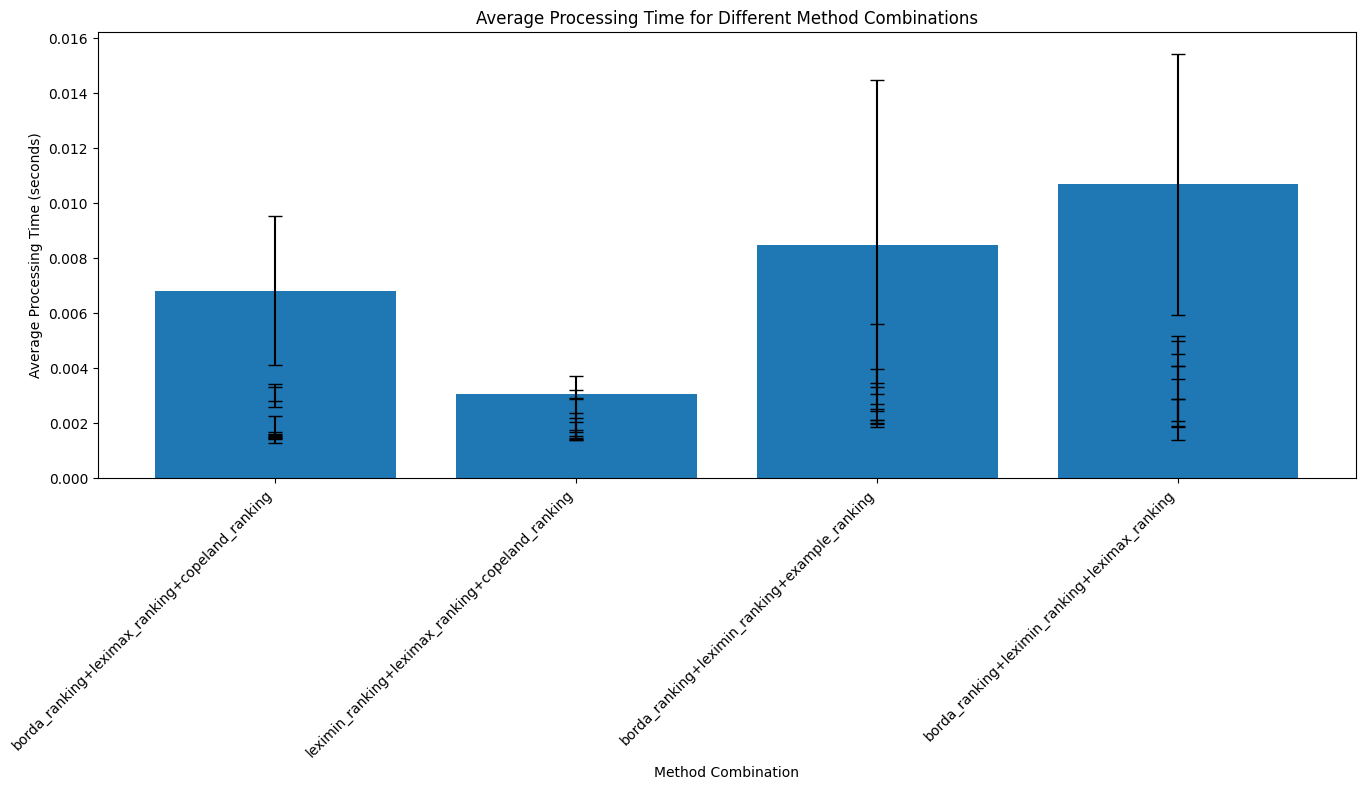

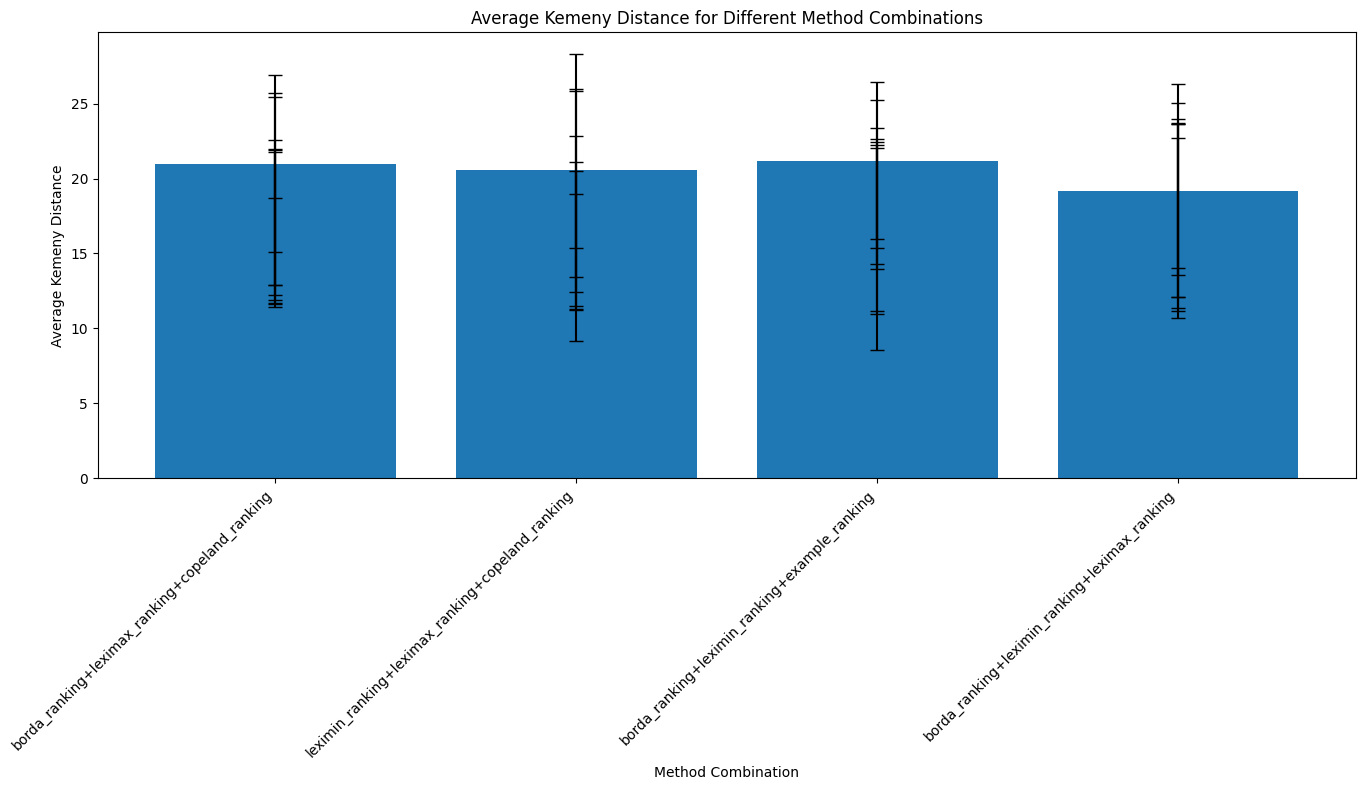

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
df_results = pd.read_csv('/content/ranking_results.csv')

# Визуализация среднего времени выполнения
plt.figure(figsize=(14, 8))
plt.bar(df_results["Method"], df_results["Average Time"], yerr=df_results["Std Time"], capsize=5)
plt.xlabel('Method Combination')
plt.ylabel('Average Processing Time (seconds)')
plt.title('Average Processing Time for Different Method Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Визуализация среднего расстояния Кемени
plt.figure(figsize=(14, 8))
plt.bar(df_results["Method"], df_results["Average Kemeny Distance"], yerr=df_results["Std Kemeny Distance"], capsize=5)
plt.xlabel('Method Combination')
plt.ylabel('Average Kemeny Distance')
plt.title('Average Kemeny Distance for Different Method Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


                                             Method  Average Time  Std Time  \
0    borda_ranking+leximax_ranking+copeland_ranking      0.006813  0.002712   
1    borda_ranking+leximax_ranking+copeland_ranking      0.001513  0.000046   
2  leximin_ranking+leximax_ranking+copeland_ranking      0.001575  0.000108   
3     borda_ranking+leximin_ranking+example_ranking      0.008483  0.005977   
4     borda_ranking+leximin_ranking+leximax_ranking      0.010692  0.004746   

   Average Kemeny Distance  Std Kemeny Distance  
0                     18.8             6.881860  
1                     21.0             5.882176  
2                     17.2             5.670979  
3                     21.2             5.230679  
4                     19.0             5.000000  


<ipython-input-46-32c67cce4c52>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(methods))


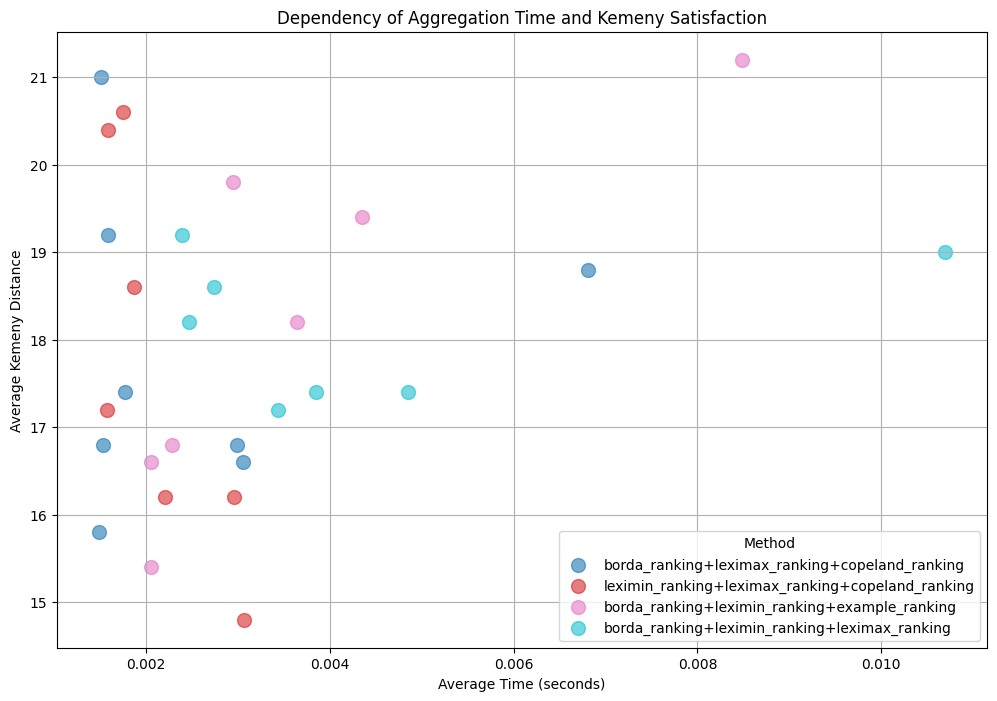

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
data = pd.read_csv('/content/ranking_results.csv')
print(data.head())

# Определение методов и цветов для графика
methods = data['Method'].unique()
colors = plt.cm.get_cmap('tab10', len(methods))

# Построение графика
plt.figure(figsize=(12, 8))
for idx, method in enumerate(methods):
    method_data = data[data['Method'] == method]
    plt.scatter(method_data['Average Time'], method_data['Average Kemeny Distance'], label=method, color=colors(idx), alpha=0.6, s=100)

plt.xlabel('Average Time (seconds)')
plt.ylabel('Average Kemeny Distance')
plt.title('Dependency of Aggregation Time and Kemeny Satisfaction')
plt.legend(title='Method')
plt.grid(True)
plt.show()


                                             Method  Average Time  Std Time  \
0    borda_ranking+leximax_ranking+copeland_ranking      0.006813  0.002712   
1    borda_ranking+leximax_ranking+copeland_ranking      0.001513  0.000046   
2  leximin_ranking+leximax_ranking+copeland_ranking      0.001575  0.000108   
3     borda_ranking+leximin_ranking+example_ranking      0.008483  0.005977   
4     borda_ranking+leximin_ranking+leximax_ranking      0.010692  0.004746   

   Average Kemeny Distance  Std Kemeny Distance  
0                     18.8             6.881860  
1                     21.0             5.882176  
2                     17.2             5.670979  
3                     21.2             5.230679  
4                     19.0             5.000000  


<ipython-input-47-130fbc0ab161>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(methods))


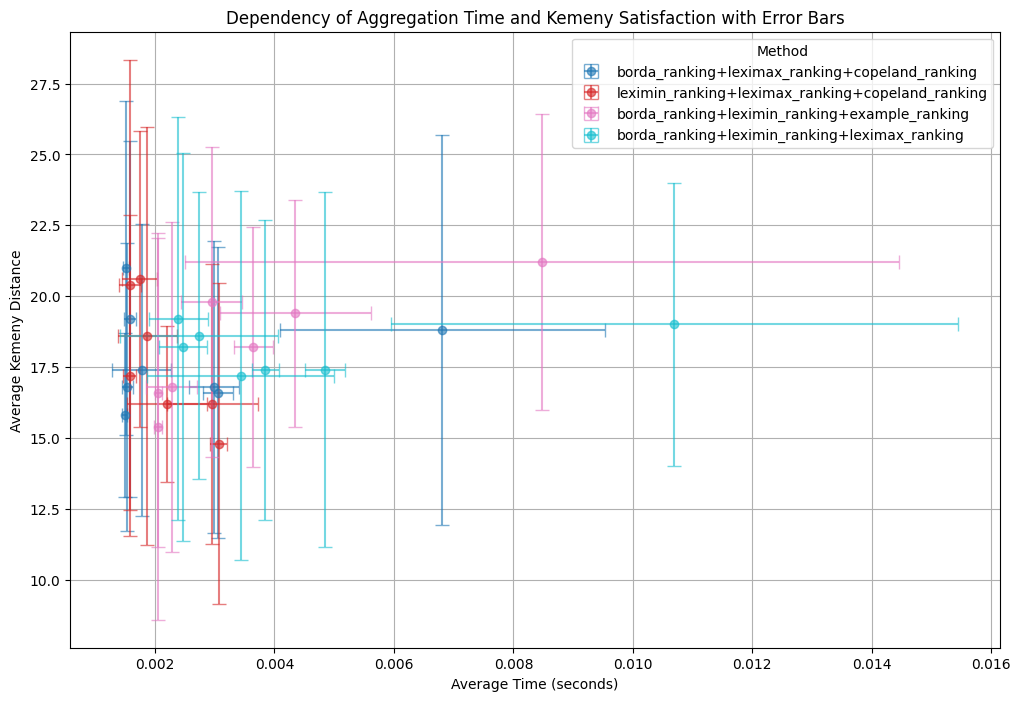

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
data = pd.read_csv('/content/ranking_results.csv')
print(data.head())

# Определение методов и цветов для графика
methods = data['Method'].unique()
colors = plt.cm.get_cmap('tab10', len(methods))

# Построение графика
plt.figure(figsize=(12, 8))
for idx, method in enumerate(methods):
    method_data = data[data['Method'] == method]
    plt.errorbar(
        method_data['Average Time'],
        method_data['Average Kemeny Distance'],
        xerr=method_data['Std Time'],
        yerr=method_data['Std Kemeny Distance'],
        fmt='o',
        label=method,
        color=colors(idx),
        alpha=0.6,
        capsize=5
    )

plt.xlabel('Average Time (seconds)')
plt.ylabel('Average Kemeny Distance')
plt.title('Dependency of Aggregation Time and Kemeny Satisfaction with Error Bars')
plt.legend(title='Method')
plt.grid(True)
plt.show()


                                             Method  Average Time  Std Time  \
0    borda_ranking+leximax_ranking+copeland_ranking      0.006813  0.002712   
1    borda_ranking+leximax_ranking+copeland_ranking      0.001513  0.000046   
2  leximin_ranking+leximax_ranking+copeland_ranking      0.001575  0.000108   
3     borda_ranking+leximin_ranking+example_ranking      0.008483  0.005977   
4     borda_ranking+leximin_ranking+leximax_ranking      0.010692  0.004746   

   Average Kemeny Distance  Std Kemeny Distance  
0                     18.8             6.881860  
1                     21.0             5.882176  
2                     17.2             5.670979  
3                     21.2             5.230679  
4                     19.0             5.000000  
Pareto Optimal Solutions:
                                              Method  Average Time  Std Time  \
7      borda_ranking+leximin_ranking+example_ranking      0.002051  0.000063   
14  leximin_ranking+leximax_ranking+cop

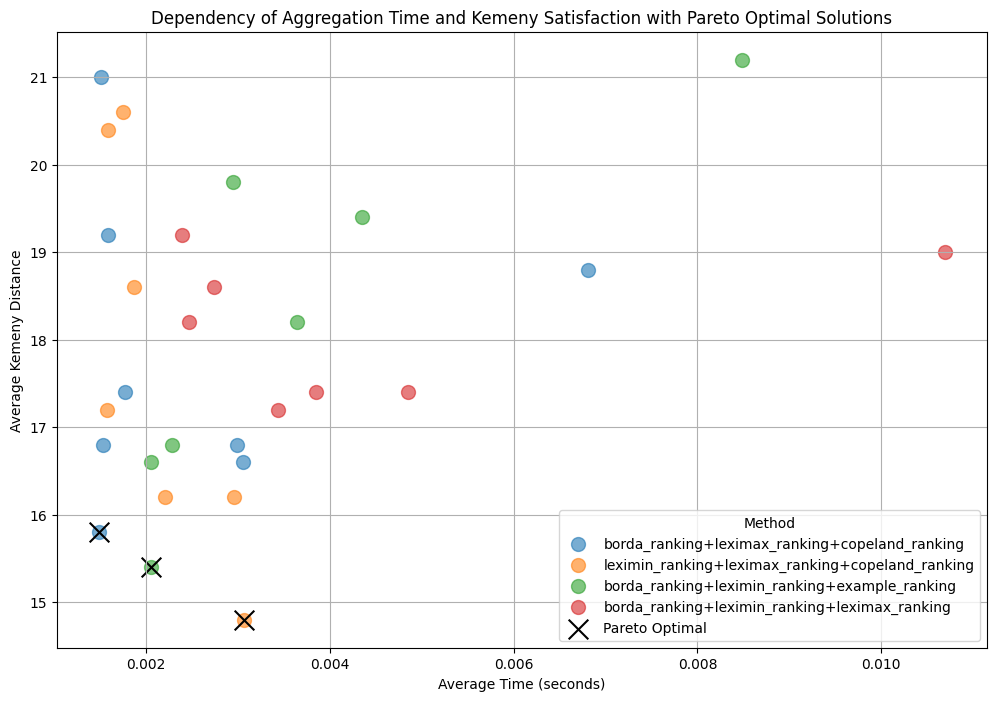

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
data = pd.read_csv('/content/ranking_results.csv')
print(data.head())

# Определение, доминирует ли точка А точку B
def dominates(row, candidate):
    return all(row <= candidate) and any(row < candidate)

# Нахождение Парето-оптимальных решений
pareto_optimal = []
for i, row in data.iterrows():
    is_dominated = False
    for j, candidate in data.iterrows():
        if dominates(candidate[['Average Time', 'Average Kemeny Distance']], row[['Average Time', 'Average Kemeny Distance']]):
            is_dominated = True
            break
    if not is_dominated:
        pareto_optimal.append(row)

pareto_optimal = pd.DataFrame(pareto_optimal)
print("Pareto Optimal Solutions:")
print(pareto_optimal)

# Визуализация Парето-оптимальных решений
plt.figure(figsize=(12, 8))
for idx, method in enumerate(data['Method'].unique()):
    method_data = data[data['Method'] == method]
    plt.scatter(method_data['Average Time'], method_data['Average Kemeny Distance'], label=method, alpha=0.6, s=100)

plt.scatter(pareto_optimal['Average Time'], pareto_optimal['Average Kemeny Distance'], label='Pareto Optimal', color='black', marker='x', s=200)

plt.xlabel('Average Time (seconds)')
plt.ylabel('Average Kemeny Distance')
plt.title('Dependency of Aggregation Time and Kemeny Satisfaction with Pareto Optimal Solutions')
plt.legend(title='Method')
plt.grid(True)
plt.show()
